In [7]:
# 基于相关系数和互信息选择特征
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
def select_features(X_train, y_train, X_test, score_function, k_value):
	# configure to select all features
	fs = SelectKBest(score_func=score_function, k=k_value)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [3]:
data_df = pd.read_csv(r"E:\Code_R\health_iFEMG_US\Data\iFEMG\iFEMG_curl_all.csv", header=0, index_col=None)
data_df.head()

,bicps_br_subject_name,bicps_br_height(cm),bicps_br_weight(kg),bicps_br_gender,bicps_br_age,bicps_br_label(kg),bicps_br_FMG,bicps_br_mav,bicps_br_rms,bicps_br_wave_length,...,tricps_br_medial_mean_freq,tricps_br_medial_mean_power_freq,tricps_br_lateral_FMG,tricps_br_lateral_mav,tricps_br_lateral_rms,tricps_br_lateral_wave_length,tricps_br_lateral_zero_crossing,tricps_br_lateral_slope_sign_change,tricps_br_lateral_mean_freq,tricps_br_lateral_mean_power_freq
0,chw,165,55,1,22,0.0,0.785424,0.619119,0.515783,0.599997,...,19.446411,26.535749,0.205748,3.774143,4.928638,2.928105,-0.126670,-0.096836,15.250331,21.728353
1,chw,165,55,1,22,0.0,0.720584,1.148243,1.403360,1.075985,...,16.658652,22.014694,0.150691,0.512222,0.363698,0.286566,-0.157561,0.182790,18.031269,35.609530
2,chw,165,55,1,22,0.0,0.636993,0.281217,0.295154,0.387338,...,18.510912,20.318615,0.149297,0.123770,-0.005632,0.290560,0.024460,0.103409,40.633424,51.415324
3,chw,165,55,1,22,0.0,0.839786,0.330342,0.332777,0.501974,...,20.998436,23.855836,0.201143,0.081555,0.384973,0.593592,0.536885,0.059259,51.219253,55.677856
4,chw,165,55,1,22,0.0,0.937684,0.355456,0.087872,0.744299,...,22.202039,22.144516,0.187731,0.169043,-0.034068,0.257089,-0.044391,0.036053,48.274587,57.545935


In [4]:
# 获取数据集 -> 标准化 -> 划分训练集和测试集 -> 特征选择 -> 可视化和模型训练
x = data_df.iloc[:, 6:30]
y = data_df['bicps_br_label(kg)'].values
print(f"数据集维度：{x.shape}")
print(f"标签维度：{y.shape}")

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=1)

数据集维度：(587, 24)
标签维度：(587,)


bicps_br_FMG: 1.2542023133830704
bicps_br_mav: 3.48040682356373
bicps_br_rms: 6.149789301607563
bicps_br_wave_length: 0.39667323896023543
bicps_br_zero_crossing: 40.07786292820341
bicps_br_slope_sign_change: 1.8983400072823415
bicps_br_mean_freq: 8.18979007221897
bicps_br_mean_power_freq: 1.7145664106921683
tricps_br_medial_FMG: 1.6515163361473972
tricps_br_medial_mav: 0.0005317969380249357
tricps_br_medial_rms: 0.3509653970075076
tricps_br_medial_wave_length: 0.0020650413974960995
tricps_br_medial_zero_crossing: 4.2882458819184635
tricps_br_medial_slope_sign_change: 0.06314254616556528
tricps_br_medial_mean_freq: 0.23196079179472312
tricps_br_medial_mean_power_freq: 0.09585880378591342
tricps_br_lateral_FMG: 7.371290772336233
tricps_br_lateral_mav: 0.9410433847895542
tricps_br_lateral_rms: 0.07961662703377555
tricps_br_lateral_wave_length: 15.782985020484418
tricps_br_lateral_zero_crossing: 2.2947615631998914
tricps_br_lateral_slope_sign_change: 7.937330581892252
tricps_br_lateral_mea

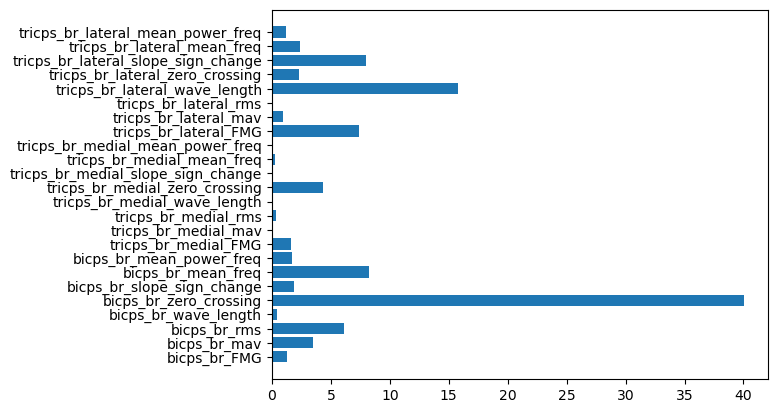

MAE: 0.6443230587755563


In [10]:
# 基于f_regression选择特征
x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test, f_regression, 10)
# what are scores for the features
for i in range(len(fs.scores_)):
	# print('Feature %d: %f' % (i, fs.scores_[i]))
	print(f"{list(x)[i]}: {fs.scores_[i]}")
	pass

# plot the scores
plt.barh(list(x), fs.scores_)
plt.show()

# fit the model
model = LinearRegression()
model.fit(x_train_fs, y_train)
# evaluate the model
yhat = model.predict(x_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print(f"MAE: {mae}")

bicps_br_FMG: 0.08868685635937013
bicps_br_mav: 0.028057934143886243
bicps_br_rms: 0.0
bicps_br_wave_length: 0.01698974029643452
bicps_br_zero_crossing: 0.046447289093216604
bicps_br_slope_sign_change: 0.03304935393531405
bicps_br_mean_freq: 0.06367795608146487
bicps_br_mean_power_freq: 0.09506737836991075
tricps_br_medial_FMG: 0.16095548934830006
tricps_br_medial_mav: 0.0
tricps_br_medial_rms: 0.0
tricps_br_medial_wave_length: 0.042382477978246236
tricps_br_medial_zero_crossing: 0.0006188286419863687
tricps_br_medial_slope_sign_change: 0.0
tricps_br_medial_mean_freq: 0.011901353814272042
tricps_br_medial_mean_power_freq: 0.0
tricps_br_lateral_FMG: 0.07807200872315256
tricps_br_lateral_mav: 0.0
tricps_br_lateral_rms: 0.01622933804071991
tricps_br_lateral_wave_length: 0.0453109506904088
tricps_br_lateral_zero_crossing: 0.006644609305865856
tricps_br_lateral_slope_sign_change: 0.028217922957990638
tricps_br_lateral_mean_freq: 0.0
tricps_br_lateral_mean_power_freq: 0.0067337622725620605


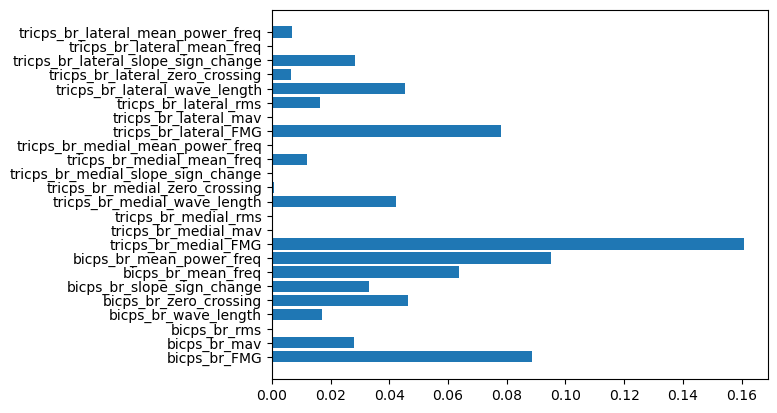

MAE: 0.644


In [11]:
# 基于互信息选择特征
x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test, mutual_info_regression, 10)
# what are scores for the features
for i in range(len(fs.scores_)):
	# print('Feature %d: %f' % (i, fs.scores_[i]))
	print(f"{list(x)[i]}: {fs.scores_[i]}")
	pass

# plot the scores
plt.barh(list(x), fs.scores_)
# 获取当前的Axes对象
plt.show()

# fit the model
model = LinearRegression()
model.fit(x_train_fs, y_train)
# evaluate the model
yhat = model.predict(x_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

In [ ]:
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

In [ ]:
# define dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LinearRegression()
fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
# define the grid
grid = dict()
grid['sel__k'] = [i for i in range(X.shape[1]-20, X.shape[1]+1)]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X, y)
# summarize best
print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))